In [87]:
"""
Created on March 1 2019

@author: Nkosi Mngomezulu
"""
# importing packages
import pandas as pd
import numpy as np
import time 
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib as plt
import seaborn as sb
import scipy.stats as stat
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_10e3dfa569d64673a3c50397badabc76 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qx6wEPbafXCSaGG7OTI1CtcD9TMgTEEKbura7RRsMtBb',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_10e3dfa569d64673a3c50397badabc76.get_object(Bucket='seniorprojectpart1-donotdelete-pr-hpbnt6q4gnewbx',Key='GSA.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [88]:
#Introduction

In [89]:
# So, for this dataset, I did some of the cleaning in Excel to try and save computational time. 
# It had over 50,000 rows so it was much easier to clean in Excel and line up the columns well for the model.
# This would later help in building the model.

In [90]:
#printing initial dataframe top
df.head()

,gre,toefl,rating,sop,lor,cgpa,mgpa,age,rate,work,research,gender,portfolio,resume,afford,admit
0,331,106,4,4,3,5.790,3.790,39,68,0,1,1,1,0,0,0.92
1,312,100,1,3,3,5.322,3.322,30,6,1,0,0,0,1,1,0.76
2,291,112,2,3,4,4.800,2.800,43,27,1,0,1,0,1,1,0.72
3,323,92,4,1,3,5.202,3.202,37,46,1,0,1,0,1,0,0.80
4,326,98,3,5,1,4.926,2.926,25,65,0,1,0,1,0,1,0.65


In [91]:
#printing initial dataframe bottom
df.tail()

,gre,toefl,rating,sop,lor,cgpa,mgpa,age,rate,work,research,gender,portfolio,resume,afford,admit
49995,325,107,1,4,5,5.412,3.412,15,47,1,0,1,0,1,1,0.87
49996,306,116,2,4,1,5.922,3.922,40,33,1,0,1,0,1,0,0.96
49997,337,117,5,4,4,5.736,3.736,28,3,0,1,1,1,0,0,0.93
49998,329,119,4,1,2,5.058,3.058,31,35,0,1,1,1,0,0,0.73
49999,294,109,2,5,4,5.424,3.424,42,24,1,0,1,0,1,0,0.84


In [92]:
#print dataframe attributes data types in series
df.dtypes

gre            int64
toefl          int64
rating         int64
sop            int64
lor            int64
cgpa         float64
mgpa         float64
age            int64
rate           int64
work           int64
research       int64
gender         int64
portfolio      int64
resume         int64
afford         int64
admit        float64
dtype: object

In [93]:
#Statistical analysis of data distribution
df.describe()

,gre,toefl,rating,sop,lor,cgpa,mgpa,age,rate,work,research,gender,portfolio,resume,afford,admit
count,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,315.012200,105.969340,2.994020,3.0001,2.995340,5.145864,3.145864,29.933700,35.045820,0.499520,0.500480,0.500800,0.500480,0.499520,0.500060,0.721740
std,14.732226,8.381127,1.416638,1.4148,1.414284,0.362528,0.362528,8.955393,20.553637,0.500005,0.500005,0.500004,0.500005,0.500005,0.500005,0.141001
min,290.000000,92.000000,1.000000,1.0000,1.000000,4.080000,2.080000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340000
25%,302.000000,99.000000,2.000000,2.0000,2.000000,4.876500,2.876500,22.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630000
50%,315.000000,106.000000,3.000000,3.0000,3.000000,5.136000,3.136000,30.000000,35.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.720000
75%,328.000000,113.000000,4.000000,4.0000,4.000000,5.424000,3.424000,38.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.0000,5.000000,5.952000,3.952000,45.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970000


In [94]:
# Check for null values in the data frame or missing values
df.isnull().sum()

gre          0
toefl        0
rating       0
sop          0
lor          0
cgpa         0
mgpa         0
age          0
rate         0
work         0
research     0
gender       0
portfolio    0
resume       0
afford       0
admit        0
dtype: int64

In [96]:
#number of indices
df.index.values

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [97]:
#shape of original data frame
df.shape

(50000, 16)

In [98]:
# check column names so that they can be easy to work with
df.columns.values

array(['gre', 'toefl', 'rating', 'sop', 'lor', 'cgpa', 'mgpa', 'age',
       'rate', 'work', 'research', 'gender', 'portfolio', 'resume',
       'afford', 'admit'], dtype=object)

In [106]:
#For consistency, let's ensure that all column labels of type string.
# let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)
df.columns = list(map(str, df.columns))
# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

In [104]:
# Averages of the different attributes
print("Average GRE Score :{0:.2f} out of 340".format(df['gre'].mean()))
print('Average TOEFL Score:{0:.2f} out of 120'.format(df['toefl'].mean()))
print('Average CGPA:{0:.2f} out of 10'.format(df['cgpa'].mean()))
print('Average MGPA:{0:.2f} out of 4'.format(df['mgpa'].mean()))
print('Average Age:{0:.0f} out of 50'.format(df['age'].mean()))
print('Average Acceptance Rate:{0:.0f} out of 100%'.format(df['rate'].mean()))
print('Average Chance of getting admitted:{0:.2f} out of 1'.format(df['admit'].mean()))

Average GRE Score :315.01 out of 340
Average TOEFL Score:105.97 out of 120
Average CGPA:5.15 out of 10
Average MGPA:3.15 out of 4
Average Age:30 out of 50
Average Acceptance Rate:35 out of 100%
Average Chance of getting admitted:0.72 out of 1


In [130]:
print(" Minimum requirements for more than 85% chance to get admission.\n",df[(df['admit']>0.85)].min())

 Minimum requirements for more than 85% chance to get admission.
 gre          290.000
toefl         92.000
rating         1.000
sop            1.000
lor            1.000
cgpa           5.364
mgpa           3.364
age           15.000
rate           0.000
work           0.000
research       0.000
gender         0.000
portfolio      0.000
resume         0.000
afford         0.000
admit          0.860
dtype: float64


In [131]:
# Correlation Coefficients for the attributes
def find_maxCorrelations(df,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


corr_features=find_maxCorrelations(corrmat,0.8)

print(corrmat.iloc[:,15:16])

              admit
gre        0.006427
toefl     -0.002325
rating     0.005937
sop        0.016052
lor       -0.001472
cgpa       0.882413
mgpa       0.882413
age        0.005180
rate       0.004735
work      -0.005293
research   0.005293
gender     0.004233
portfolio  0.005293
resume    -0.005293
afford     0.002001
admit      1.000000


In [109]:
#Visualizing Data using Matplotlib
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


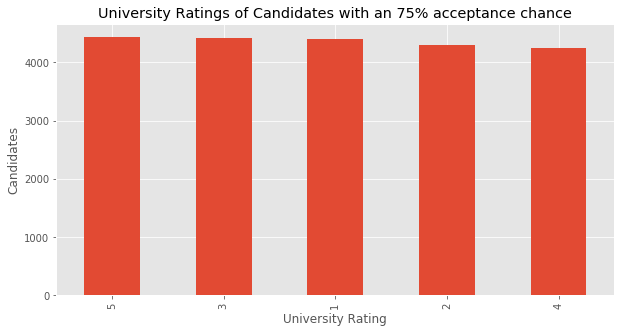

In [105]:
# Visualization of students with a 75% chance based on Rating
import matplotlib as mpl
import matplotlib.pyplot as plt
s = df[df["admit"] >= 0.75]["rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

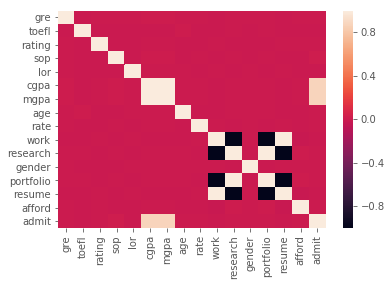

In [110]:
#Correlation Matrix
#create correlation matrix without class
Tf_corr=df.iloc[:,:]

#Correlation Matrix 

corrmat=Tf_corr.corr()

#Features :columns and rows
sb.heatmap(corrmat, 
 xticklabels=corrmat.columns,
 yticklabels=corrmat.columns)

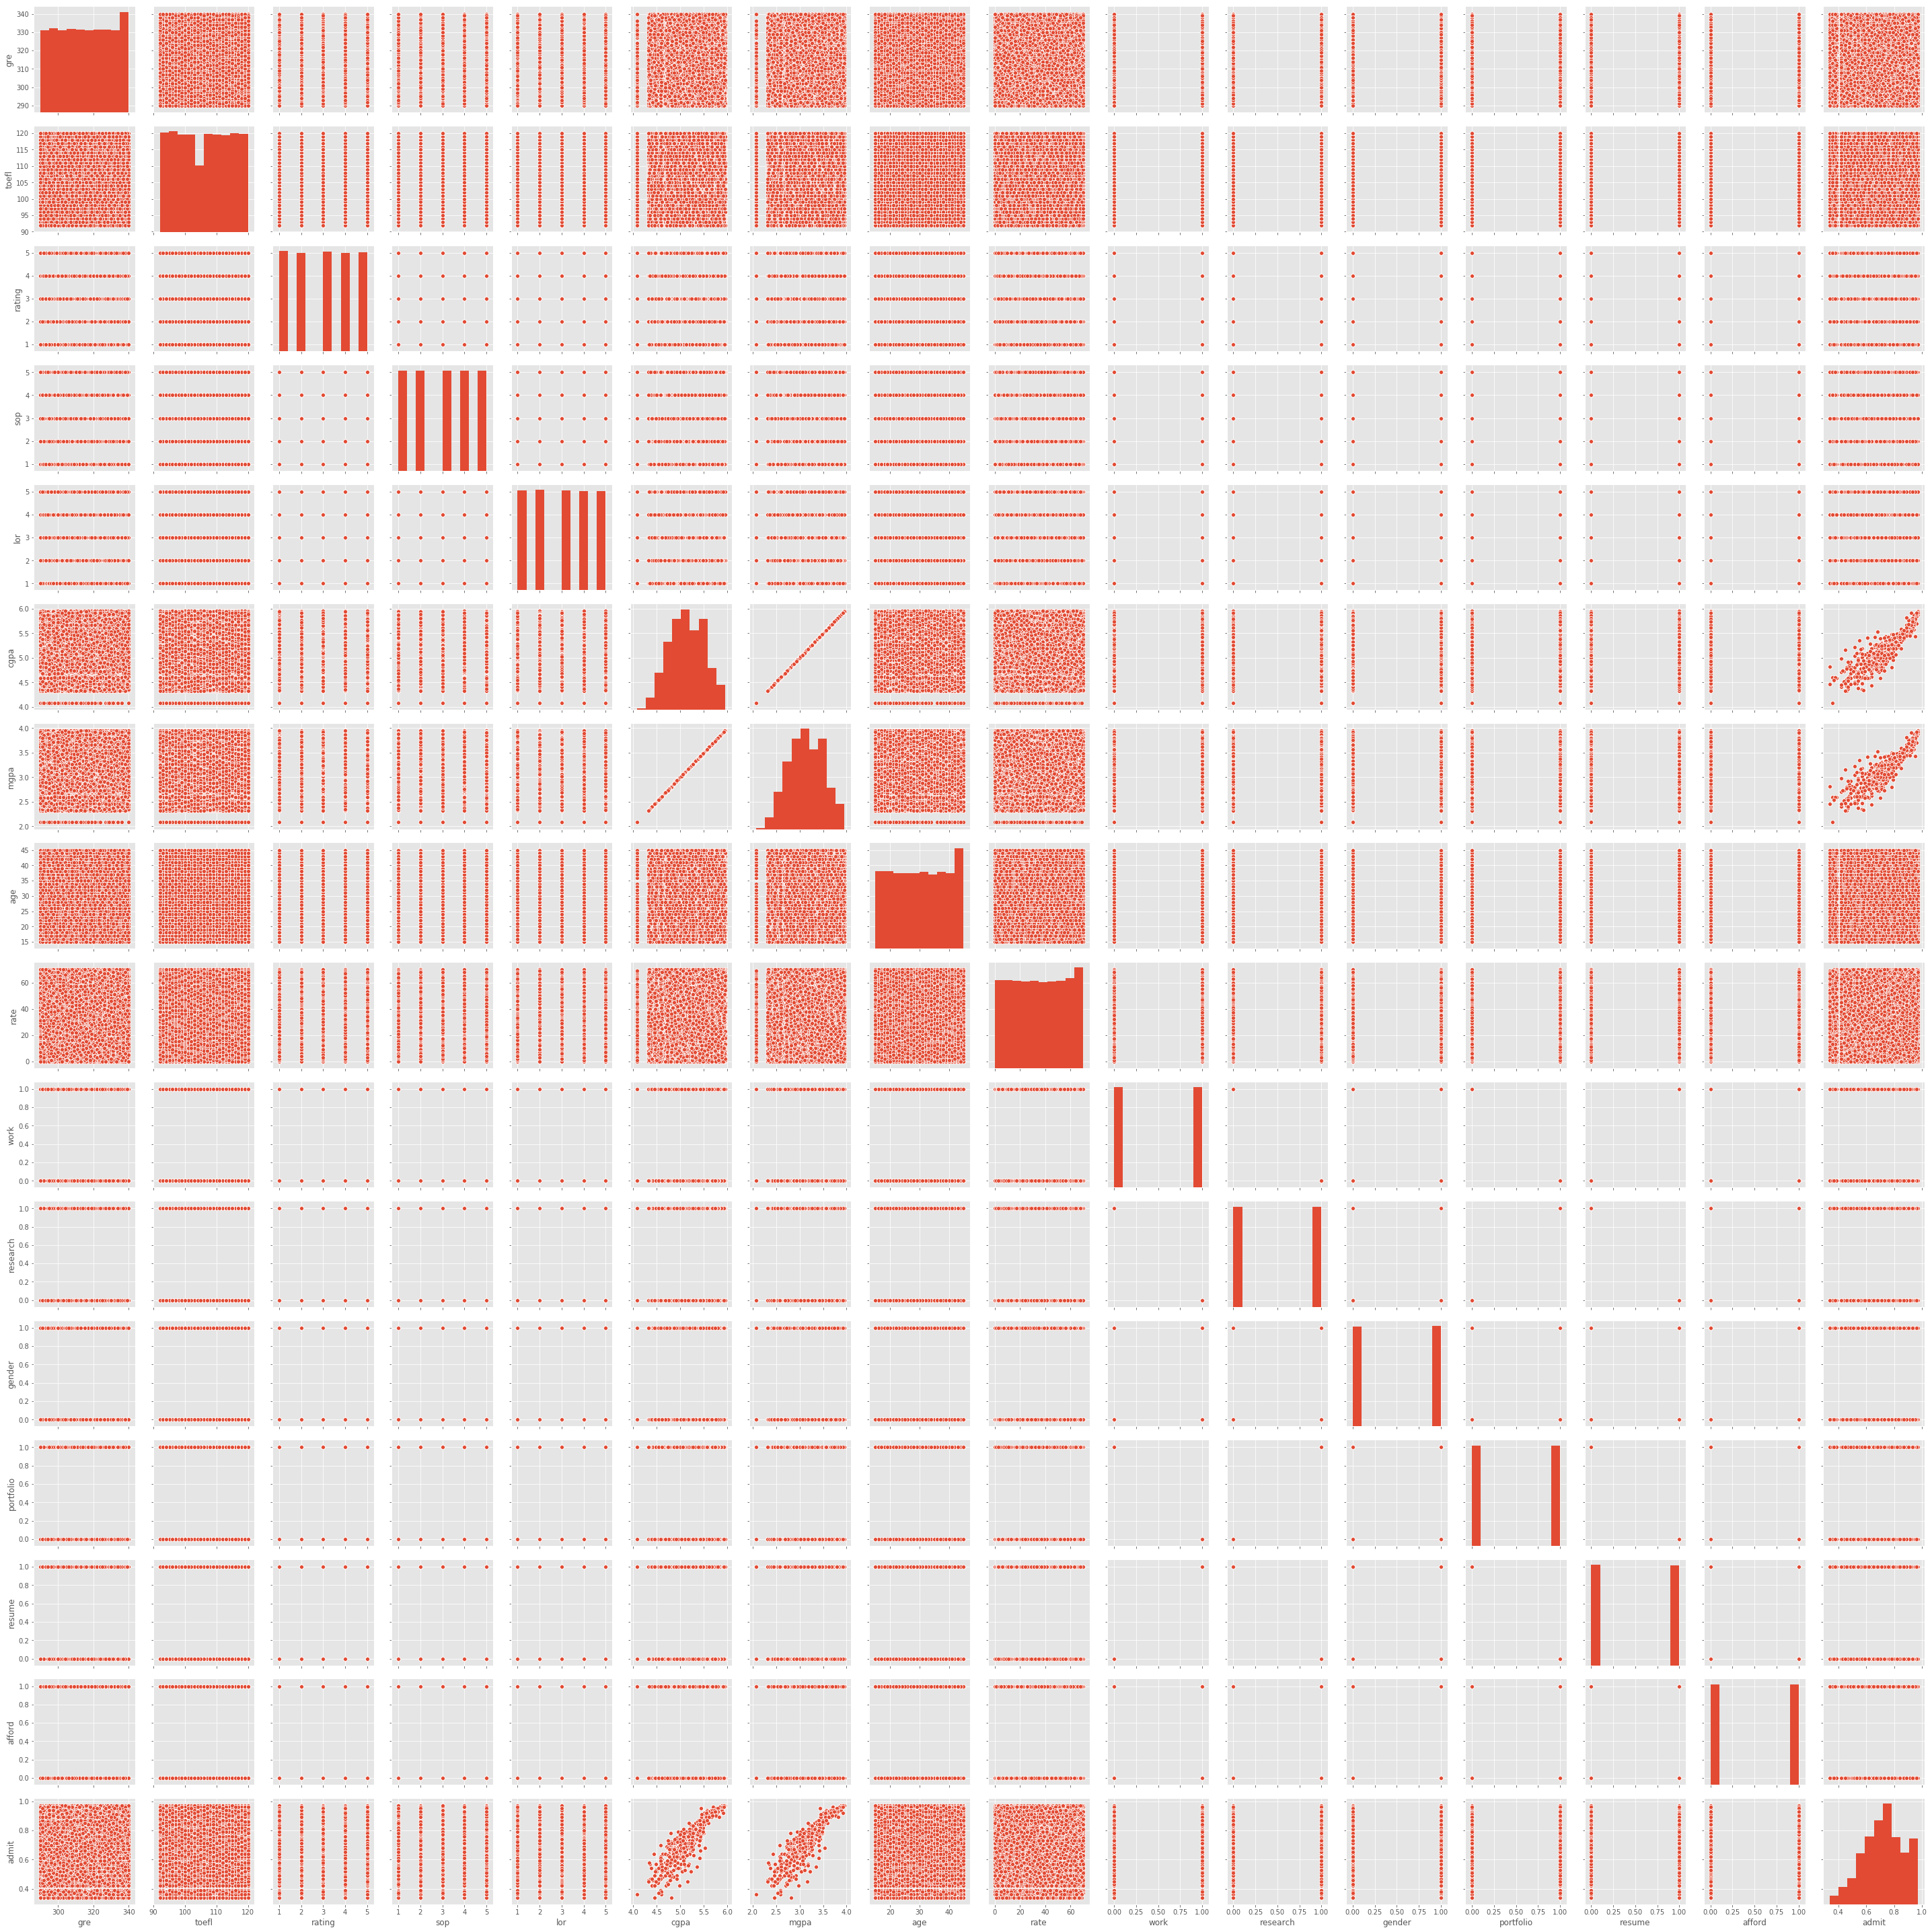

In [113]:
# correlations of all variables against each other
import seaborn as sb
sb.pairplot(df)

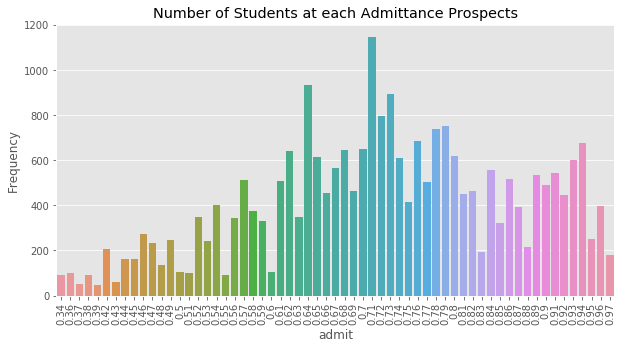

In [163]:
# Chance of Admittance of students at different levels
plt.figure(figsize=(10,5))
research_predict=df[df['research']==1.0].groupby('admit')['toefl'].count()
sb.barplot(x=research_predict.index,y=research_predict.values)
plt.title("Number of Students at each Admittance Prospects")
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

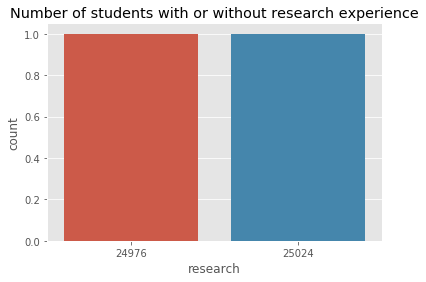

In [164]:
# Number of students with or without research experience
sb.countplot(df.research.value_counts())
plt.title("Number of students with or without research experience")
plt.show()

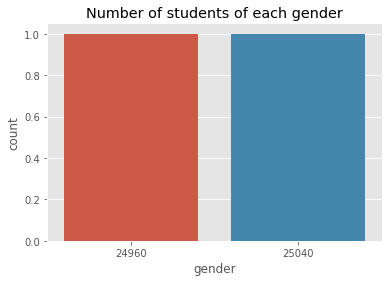

In [165]:
# Number of students of each gender
sb.countplot(df.gender.value_counts())
plt.title("Number of students of each gender")
plt.show()

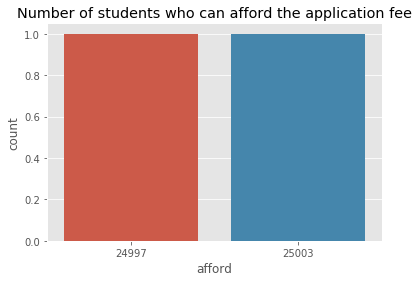

In [166]:
# Number of students who can afford the application fee and those that can't
sb.countplot(df.afford.value_counts())
plt.title("Number of students who can afford the application fee")
plt.show()

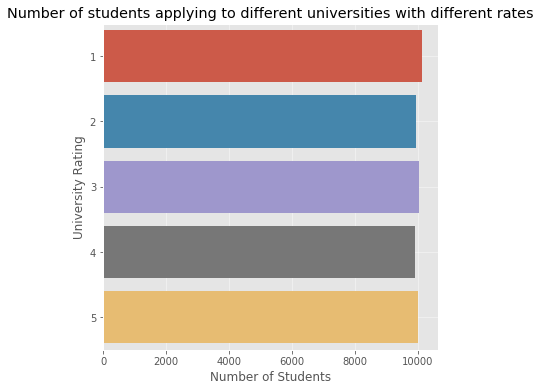

In [167]:
# Number of students applying to different universities with different rates
plt.figure(figsize=(6,6))
sb.countplot(y=df['rating'])
plt.grid(alpha=0.5)
plt.xlabel('Number of Students')
plt.ylabel('University Rating')
plt.title("Number of students applying to different universities with different rates")
plt.show()

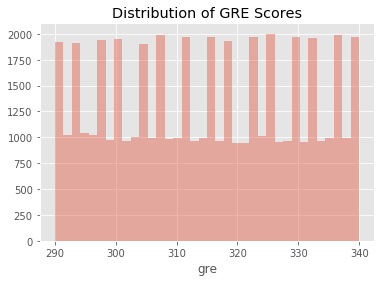

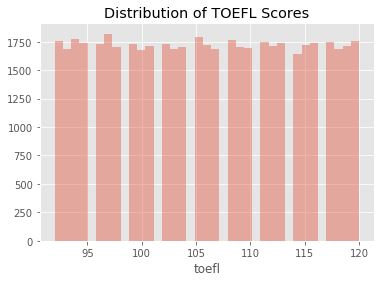

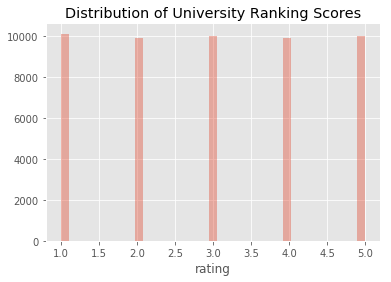

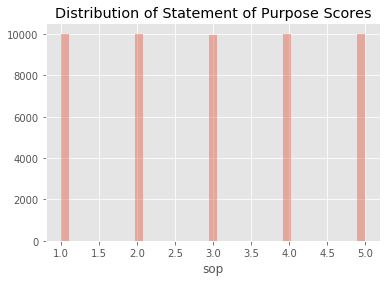

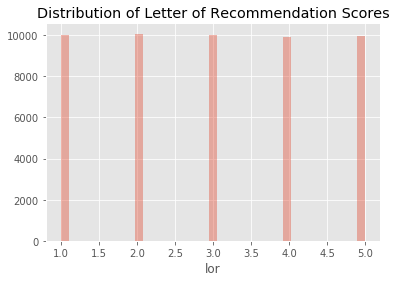

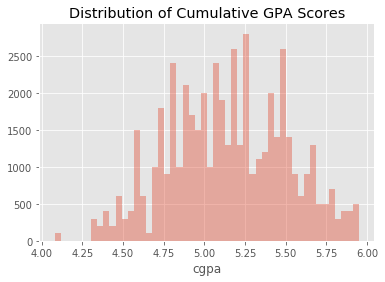

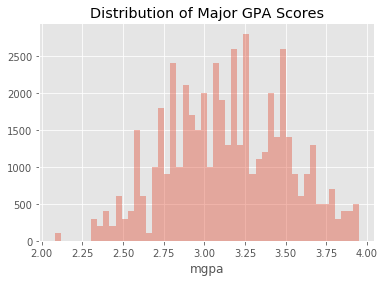

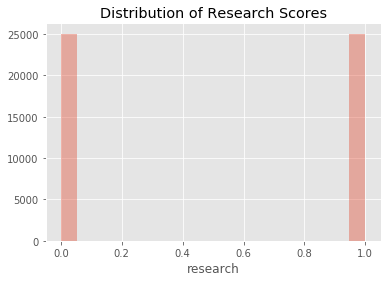

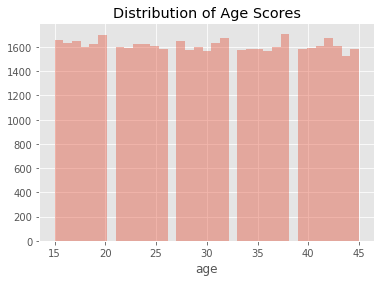

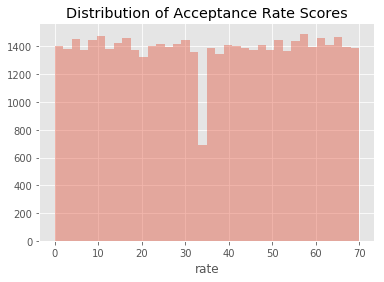

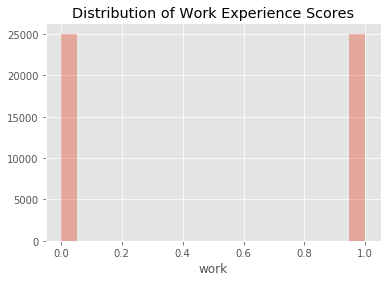

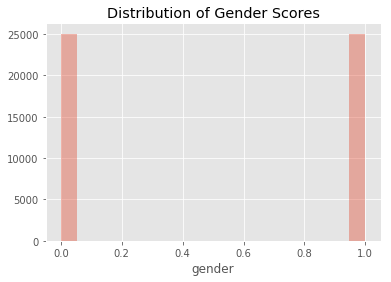

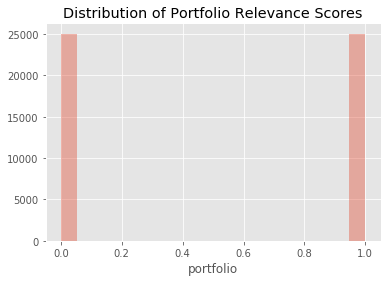

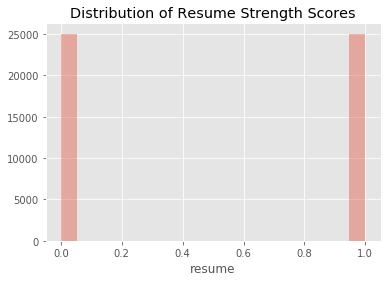

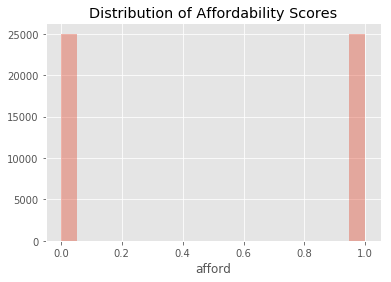

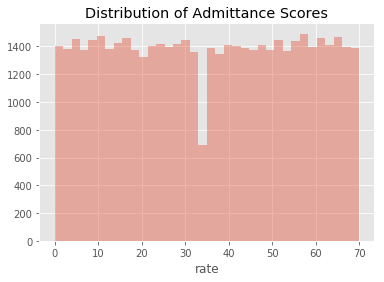

In [127]:
# Distributions of all variables
import matplotlib.pyplot as plt

fig = sns.distplot(df['gre'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['toefl'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['rating'], kde=False)
plt.title("Distribution of University Ranking Scores")
plt.show()

fig = sns.distplot(df['sop'], kde=False)
plt.title("Distribution of Statement of Purpose Scores")
plt.show()

fig = sns.distplot(df['lor'], kde=False)
plt.title("Distribution of Letter of Recommendation Scores")
plt.show()

fig = sns.distplot(df['cgpa'], kde=False)
plt.title("Distribution of Cumulative GPA Scores")
plt.show()

fig = sns.distplot(df['mgpa'], kde=False)
plt.title("Distribution of Major GPA Scores")
plt.show()

fig = sns.distplot(df['research'], kde=False)
plt.title("Distribution of Research Scores")
plt.show()

fig = sns.distplot(df['age'], kde=False)
plt.title("Distribution of Age Scores")
plt.show()

fig = sns.distplot(df['rate'], kde=False)
plt.title("Distribution of Acceptance Rate Scores")
plt.show()

fig = sns.distplot(df['work'], kde=False)
plt.title("Distribution of Work Experience Scores")
plt.show()

fig = sns.distplot(df['gender'], kde=False)
plt.title("Distribution of Gender Scores")
plt.show()

fig = sns.distplot(df['portfolio'], kde=False)
plt.title("Distribution of Portfolio Relevance Scores")
plt.show()

fig = sns.distplot(df['resume'], kde=False)
plt.title("Distribution of Resume Strength Scores")
plt.show()

fig = sns.distplot(df['afford'], kde=False)
plt.title("Distribution of Affordability Scores")
plt.show()

fig = sns.distplot(df['rate'], kde=False)
plt.title("Distribution of Admittance Scores")
plt.show()

plt.show()

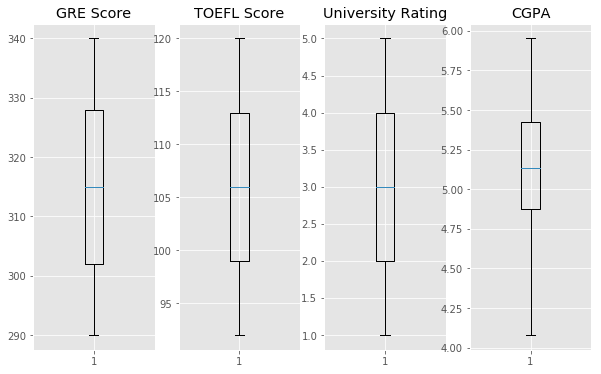

In [128]:
# Box Plots for the main four key predictors
plt.figure(1, figsize=(10,6))
plt.subplot(1,4, 1)
plt.boxplot(df['gre'])
plt.title('GRE Score')

plt.subplot(1,4,2)
plt.boxplot(df['toefl'])
plt.title('TOEFL Score')

plt.subplot(1,4,3)
plt.boxplot(df['rating'])
plt.title('University Rating')

plt.subplot(1,4,4)
plt.boxplot(df['cgpa'])
plt.title('CGPA')

plt.show()

In [170]:
# Normalize dataframe using Min Max Scaler
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


normalized_data=normalize(df)

In [171]:
# Check accuracy of linear model
x=normalized_data.iloc[:,:]

y=normalized_data.iloc[:,:]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(x_train,y_train)


y_pred = model.predict(x_test)
y_pred=pd.DataFrame(y_pred)

score=model.score(x_test,y_test)
print("Accuray: "+str(score))

Accuray: 1.0


In [172]:
from sklearn.model_selection import train_test_split

X = df.drop(['admit'], axis=1)
y = df['admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [173]:
# splitting the data into dependent and independent datasets

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# getting the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (50000, 15)
Shape of y:  (50000,)


In [174]:
# splitting into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (40000, 15)
Shape of x_test : (10000, 15)
Shape of y_train : (40000,)
Shape of y_test : (10000,)


In [175]:
# standard Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [176]:
# Linear Regression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(x_train, y_train)

linreg_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linreg_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared :", r2)

Root Mean Squared Error :  0.06678756798320051
R-Squared : 0.7745789041791958


In [177]:
# Support Vector Regressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)

svr_pred = svr.predict(x_test)

mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared:", r2)

Root Mean Squared Error :  0.07092041256683217
R-Squared: 0.7458174075276088


In [178]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

rfr_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, rfr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared:", r2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Root Mean Squared Error :  0.06678756798320051
R-Squared: 0.7745789041791958


In [179]:
# Gradient boosted decision trees Regressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared:", r2)

Root Mean Squared Error :  0.05693136068943311
R-Squared: 0.8362028180239296


In [180]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

etr_pred = etr.predict(x_test)

mse = mean_squared_error(y_test, etr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, etr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared:", r2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Root Mean Squared Error :  0.057390877323839545
R-Squared: 0.8335479969691222


In [181]:
# stacked predictions

stacked_predictions = np.column_stack((linreg_pred, etr_pred, xgb_pred))

# specifying the meta model
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_test)

# final predictions
stacked_predictions = (meta_model.predict(stacked_predictions))

mse = mean_squared_error(y_test, stacked_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, stacked_predictions)

print("Root Mean Squared Error : ",rmse)
print("R-Squared:", r2)

Root Mean Squared Error :  0.05443226595507847
R-Squared: 0.8502674827278088


In [154]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Normalisation works slightly better for Regression.
X_norm=preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,random_state=101)

In [155]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,mean_squared_error

In [157]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()]]

Text(0.5, 1.0, 'Test Values and Predictions')

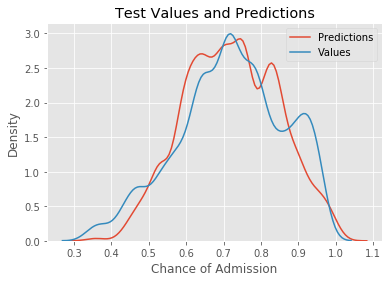

In [162]:
# To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set.

# Train the model.
meta_model.fit(X_train, y_train)
    
# Make predictions and evalute.
model_pred = meta_model.predict(X_test)
    
figsize=(8, 8)

# Density plot of the final predictions and the test values.
sb.kdeplot(model_pred, label = 'Predictions')
sb.kdeplot(y_test, label = 'Values')

# Label the plot.
plt.xlabel('Chance of Admission')
plt.ylabel('Density')
plt.title('Test Values and Predictions')